In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest

In [3]:
file_path = 'D:/A/4th year notes/ST 4052 - Statistical Learning II/dermatology_database_1.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [6]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [7]:
# Function to count question marks in each column
def count_question_marks(column):
    return column.apply(lambda x: str(x).count('?')).sum()

# Applying the function to each column
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [8]:
# Replace question marks with NaN in the 'age' column
df['age'] = df['age'].replace('?', np.nan).astype(float)

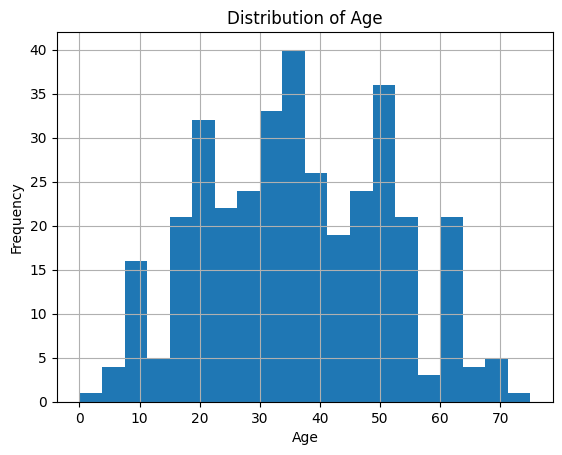

Skewness of age: 0.07335210626078169


In [9]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'age' column
df['age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Check the skewness of the 'age' column
skewness = df['age'].skew()
print(f'Skewness of age: {skewness}')


Since abs(skewness) < 0.5, the data is approximately normally distributed, so use the mean to impute

In [10]:
if abs(skewness) < 0.5:
    # Replace NaN with mean
    df['age'].fillna(df['age'].mean(), inplace=True)
else:
    # Replace NaN with median
    df['age'].fillna(df['age'].median(), inplace=True)


In [11]:
print(df['age'].isnull().sum())
print(df['age'].head())

0
0    55.0
1     8.0
2    26.0
3    40.0
4    45.0
Name: age, dtype: float64


In [12]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [13]:
df.dtypes

erythema                                 int64
scaling                                  int64
definite_borders                         int64
itching                                  int64
koebner_phenomenon                       int64
polygonal_papules                        int64
follicular_papules                       int64
oral_mucosal_involvement                 int64
knee_and_elbow_involvement               int64
scalp_involvement                        int64
family_history                           int64
melanin_incontinence                     int64
eosinophils_infiltrate                   int64
PNL_infiltrate                           int64
fibrosis_papillary_dermis                int64
exocytosis                               int64
acanthosis                               int64
hyperkeratosis                           int64
parakeratosis                            int64
clubbing_rete_ridges                     int64
elongation_rete_ridges                   int64
thinning_supr

In [14]:
# Convert 'class' and 'family_history' columns to categorical
df[['class', 'family_history']] = df[['class', 'family_history']].astype('category')

In [15]:
df.dtypes

erythema                                  int64
scaling                                   int64
definite_borders                          int64
itching                                   int64
koebner_phenomenon                        int64
polygonal_papules                         int64
follicular_papules                        int64
oral_mucosal_involvement                  int64
knee_and_elbow_involvement                int64
scalp_involvement                         int64
family_history                         category
melanin_incontinence                      int64
eosinophils_infiltrate                    int64
PNL_infiltrate                            int64
fibrosis_papillary_dermis                 int64
exocytosis                                int64
acanthosis                                int64
hyperkeratosis                            int64
parakeratosis                             int64
clubbing_rete_ridges                      int64
elongation_rete_ridges                  

In [16]:
df.shape

(366, 35)

In [17]:
#Check for duplicates in the entire DataFrame
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


In [18]:
# Filter the DataFrame to get rows where class is 2
seborrheic_dermatitis_cases = df[df['class'] == 2]

# Find the unique values of koebner_phenomenon for these records
unique_koebner_values = seborrheic_dermatitis_cases['koebner_phenomenon'].unique()

# Display the unique koebner values
print("Unique koebner_phenomenon values for class 2 (seborrheic dermatitis):", unique_koebner_values)

Unique koebner_phenomenon values for class 2 (seborrheic dermatitis): [0 2]


In [19]:
# Count the number of records for each unique koebner_phenomenon value in these cases
koebner_value_counts = seborrheic_dermatitis_cases['koebner_phenomenon'].value_counts()

# Display the counts
print("Counts of each koebner_phenomenon value for class 2 (seborrheic dermatitis):")
print(koebner_value_counts)

Counts of each koebner_phenomenon value for class 2 (seborrheic dermatitis):
koebner_phenomenon
0    60
2     1
Name: count, dtype: int64


Only 0 is possible as koebner_phenomenon is not a symptom of seborrheic dermatitis

In [20]:
# Remove the record where class is 2 and koebner_phenomenon is 2
filtered_df = df[~((df['class'] == 2) & (df['koebner_phenomenon'] == 2))]

# Verify the record has been removed
print(filtered_df.shape)

(365, 35)


In [21]:
#Features (all columns except the target column)
X = filtered_df.drop(columns=['class'])
#Target variable
y = filtered_df['class']

#Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting datasets to verify the split
print("Training set - Features shape:", X_train.shape, " Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape, " Target shape:", y_test.shape)

Training set - Features shape: (292, 34)  Target shape: (292,)
Testing set - Features shape: (73, 34)  Target shape: (73,)


Class distribution in the training set:
class
1    85
3    59
2    49
5    43
4    42
6    14
Name: count, dtype: int64


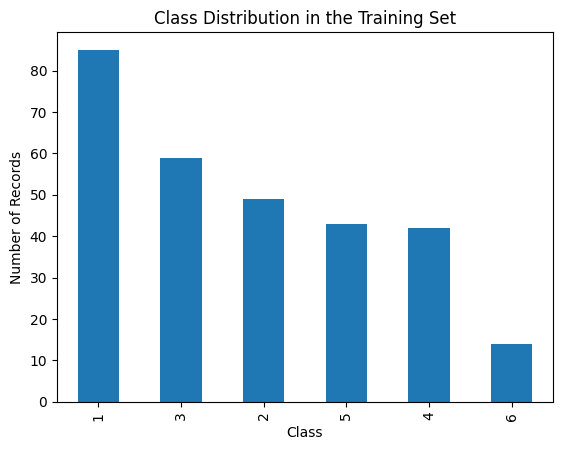

In [22]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable
class_distribution = y_train.value_counts()

# Print the class distribution
print("Class distribution in the training set:")
print(class_distribution)

# Plot the class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution in the Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Records')
plt.show()


In [23]:
from imblearn.over_sampling import SMOTENC

In [24]:
# Specify which columns are categorical
categorical_features = ['family_history']

# Get the index of the categorical features
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

In [25]:
# Initialize SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Fit and resample the data
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

In [26]:
# Verify the class distribution after resampling
import pandas as pd

y_train_resampled_series = pd.Series(y_train_resampled)
print("Class distribution after SMOTENC:")
print(y_train_resampled_series.value_counts())

Class distribution after SMOTENC:
class
1    85
2    85
3    85
4    85
5    85
6    85
Name: count, dtype: int64


Scale numerical features

In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Identify numerical features (including ordinal)
numerical_features = X_train_resampled.select_dtypes(include=['int64', 'float64']).columns

# Separate numerical features
X_train_numerical = X_train_resampled[numerical_features]
X_test_numerical = X_test[numerical_features]

# Separate categorical features
X_train_categorical = X_train_resampled.drop(columns=numerical_features)
X_test_categorical = X_test.drop(columns=numerical_features)

# Initialize and fit the MinMaxScaler
scaler = MinMaxScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

# Combine scaled numerical features with the unchanged categorical features
X_train_preprocessed = np.hstack([X_train_numerical_scaled, X_train_categorical.values])
X_test_preprocessed = np.hstack([X_test_numerical_scaled, X_test_categorical.values])

# Print the shapes to verify
print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("X_test_preprocessed shape:", X_test_preprocessed.shape)

X_train_preprocessed shape: (510, 34)
X_test_preprocessed shape: (73, 34)


In [28]:
import pandas as pd

# Convert preprocessed numpy arrays back to DataFrames for easier inspection
# Assuming you have column names for the original features
numerical_features = X_train_resampled.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_resampled.drop(columns=numerical_features).columns

# Create DataFrames for scaled numerical features
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_features)

# Create DataFrames for unchanged categorical features
X_train_categorical_df = pd.DataFrame(X_train_categorical.values, columns=categorical_features)
X_test_categorical_df = pd.DataFrame(X_test_categorical.values, columns=categorical_features)

# Combine scaled numerical features with categorical features
X_train_preprocessed_df = pd.concat([X_train_numerical_scaled_df, X_train_categorical_df], axis=1)
X_test_preprocessed_df = pd.concat([X_test_numerical_scaled_df, X_test_categorical_df], axis=1)

# Display the first few rows of the preprocessed data
print("First few rows of the preprocessed training data:")
print(X_train_preprocessed_df.head())

print("\nFirst few rows of the preprocessed test data:")
print(X_test_preprocessed_df.head())


First few rows of the preprocessed training data:
   erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0  0.666667  0.666667          0.666667  1.000000            0.333333   
1  0.333333  0.333333          0.000000  0.666667            0.000000   
2  0.333333  0.333333          0.000000  0.333333            0.000000   
3  1.000000  0.666667          0.333333  0.666667            0.000000   
4  0.333333  0.333333          0.666667  1.000000            0.000000   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0           0.666667            0.000000                  0.666667   
1           0.000000            0.000000                  0.000000   
2           0.000000            0.666667                  0.000000   
3           0.000000            0.000000                  0.000000   
4           0.000000            0.000000                  0.000000   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                         0.0    

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Example: Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_preprocessed, y_train_resampled)

# Predict on the training set
y_pred_train = log_reg.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test = log_reg.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Logistic Regression Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train_resampled, y_pred_train))
print("Accuracy:", accuracy_score(y_train_resampled, y_pred_train))

# Evaluate the model on the test set
print("\nLogistic Regression Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))


Logistic Regression Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.98      0.95      0.96        85
           3       1.00      1.00      1.00        85
           4       0.95      0.98      0.97        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           0.99       510
   macro avg       0.99      0.99      0.99       510
weighted avg       0.99      0.99      0.99       510

Accuracy: 0.9882352941176471

Logistic Regression Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5    

Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf_clf.fit(X_train_preprocessed, y_train_resampled)

# Predict on the training set
y_pred_train_rf = rf_clf.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test_rf = rf_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Random Forest Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train_resampled, y_pred_train_rf))
print("Accuracy:", accuracy_score(y_train_resampled, y_pred_train_rf))

# Evaluate the model on the test set
print("\nRandom Forest Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_test_rf))


Random Forest Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

Accuracy: 1.0

Random Forest Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00

SVM

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize Support Vector Classifier
svm_clf = SVC(random_state=42)

# Fit the model on the resampled training data
svm_clf.fit(X_train_preprocessed, y_train_resampled)

# Predict on the training set
y_pred_train_svm = svm_clf.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test_svm = svm_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Support Vector Machine Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train_resampled, y_pred_train_svm))
print("Accuracy:", accuracy_score(y_train_resampled, y_pred_train_svm))

# Evaluate the model on the test set
print("\nSupport Vector Machine Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))


Support Vector Machine Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.99      0.94      0.96        85
           3       1.00      1.00      1.00        85
           4       0.94      0.99      0.97        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           0.99       510
   macro avg       0.99      0.99      0.99       510
weighted avg       0.99      0.99      0.99       510

Accuracy: 0.9882352941176471

Support Vector Machine Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
          

Gradient Boost

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_clf.fit(X_train_preprocessed, y_train_resampled)

# Predict on the training set
y_pred_train_gb = gb_clf.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test_gb = gb_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Gradient Boosting Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train_resampled, y_pred_train_gb))
print("Accuracy:", accuracy_score(y_train_resampled, y_pred_train_gb))

# Evaluate the model on the test set
print("\nGradient Boosting Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_test_gb))



Gradient Boosting Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

Accuracy: 1.0

Gradient Boosting Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        11
           3       1.00      0.92      0.96        13
           4       0.88      1.00      0.93         7
           5       1.00      1.00  

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the model on the resampled training data
knn_clf.fit(X_train_preprocessed, y_train_resampled)

# Predict on both the training and test sets
y_train_pred_knn = knn_clf.predict(X_train_preprocessed)
y_test_pred_knn = knn_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("K-Nearest Neighbors Performance on Training Set:")
print(classification_report(y_train_resampled, y_train_pred_knn))
print("Training Set Accuracy:", accuracy_score(y_train_resampled, y_train_pred_knn))

# Evaluate the model on the test set
print("\nK-Nearest Neighbors Performance on Test Set:")
print(classification_report(y_test, y_test_pred_knn))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_knn))

K-Nearest Neighbors Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        85
           2       0.98      0.94      0.96        85
           3       1.00      1.00      1.00        85
           4       0.94      0.99      0.97        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           0.99       510
   macro avg       0.99      0.99      0.99       510
weighted avg       0.99      0.99      0.99       510

Training Set Accuracy: 0.9862745098039216

K-Nearest Neighbors Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00      

Logistic Ridge

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with Ridge (L2) regularization
log_reg_ridge = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
log_reg_ridge.fit(X_train_preprocessed, y_train_resampled)

# Predict on both the training and test sets
y_train_pred_log_reg_ridge = log_reg_ridge.predict(X_train_preprocessed)
y_test_pred_log_reg_ridge = log_reg_ridge.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Logistic Regression Ridge Performance on Training Set:")
print(classification_report(y_train_resampled, y_train_pred_log_reg_ridge))
print("Training Set Accuracy:", accuracy_score(y_train_resampled, y_train_pred_log_reg_ridge))

# Evaluate the model on the test set
print("\nLogistic Regression Ridge Performance on Test Set:")
print(classification_report(y_test, y_test_pred_log_reg_ridge))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_log_reg_ridge))


Logistic Regression Ridge Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.98      0.95      0.96        85
           3       1.00      1.00      1.00        85
           4       0.95      0.98      0.97        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           0.99       510
   macro avg       0.99      0.99      0.99       510
weighted avg       0.99      0.99      0.99       510

Training Set Accuracy: 0.9882352941176471

Logistic Regression Ridge Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      1.00    

Logistic Lasso

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with Lasso (L1) regularization
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
log_reg_lasso.fit(X_train_preprocessed, y_train_resampled)

# Predict on both the training and test sets
y_train_pred_log_reg_lasso = log_reg_lasso.predict(X_train_preprocessed)
y_test_pred_log_reg_lasso = log_reg_lasso.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Logistic Regression Lasso Performance on Training Set:")
print(classification_report(y_train_resampled, y_train_pred_log_reg_lasso))
print("Training Set Accuracy:", accuracy_score(y_train_resampled, y_train_pred_log_reg_lasso))

# Evaluate the model on the test set
print("\nLogistic Regression Lasso Performance on Test Set:")
print(classification_report(y_test, y_test_pred_log_reg_lasso))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_log_reg_lasso))

Logistic Regression Lasso Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.94      0.98      0.96        85
           3       1.00      1.00      1.00        85
           4       0.98      0.94      0.96        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           0.99       510
   macro avg       0.99      0.99      0.99       510
weighted avg       0.99      0.99      0.99       510

Training Set Accuracy: 0.9862745098039216

Logistic Regression Lasso Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      1.00    

Multinomial Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model on the resampled training data
mnb.fit(X_train_preprocessed, y_train_resampled)

# Predict on both the training and test sets
y_train_pred_mnb = mnb.predict(X_train_preprocessed)
y_test_pred_mnb = mnb.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Multinomial Naive Bayes Performance on Training Set:")
print(classification_report(y_train_resampled, y_train_pred_mnb))
print("Training Set Accuracy:", accuracy_score(y_train_resampled, y_train_pred_mnb))

# Evaluate the model on the test set
print("\nMultinomial Naive Bayes Performance on Test Set:")
print(classification_report(y_test, y_test_pred_mnb))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_mnb))

Multinomial Naive Bayes Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.94      0.95      0.95        85
           3       1.00      1.00      1.00        85
           4       0.95      0.94      0.95        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        85

    accuracy                           0.98       510
   macro avg       0.98      0.98      0.98       510
weighted avg       0.98      0.98      0.98       510

Training Set Accuracy: 0.9823529411764705

Multinomial Naive Bayes Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00        13
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.

BEST MODEL-GRADIENT BOOST

                                Feature    Importance
29                 follicular_horn_plug  1.769523e-01
13                       PNL_infiltrate  1.698329e-01
20               elongation_rete_ridges  1.655995e-01
5                     polygonal_papules  1.420879e-01
31  inflammatory_mononuclear_infiltrate  5.298854e-02
26     vacuolisation_damage_basal_layer  4.908687e-02
12               eosinophils_infiltrate  3.705014e-02
3                               itching  3.453143e-02
4                    koebner_phenomenon  3.195677e-02
6                    follicular_papules  2.985452e-02
19                 clubbing_rete_ridges  1.784275e-02
14            fibrosis_papillary_dermis  1.646460e-02
2                      definite_borders  1.526021e-02
18                        parakeratosis  1.282838e-02
15                           exocytosis  1.009429e-02
24                focal_hypergranulosis  7.403805e-03
7              oral_mucosal_involvement  5.053499e-03
32                 band_like

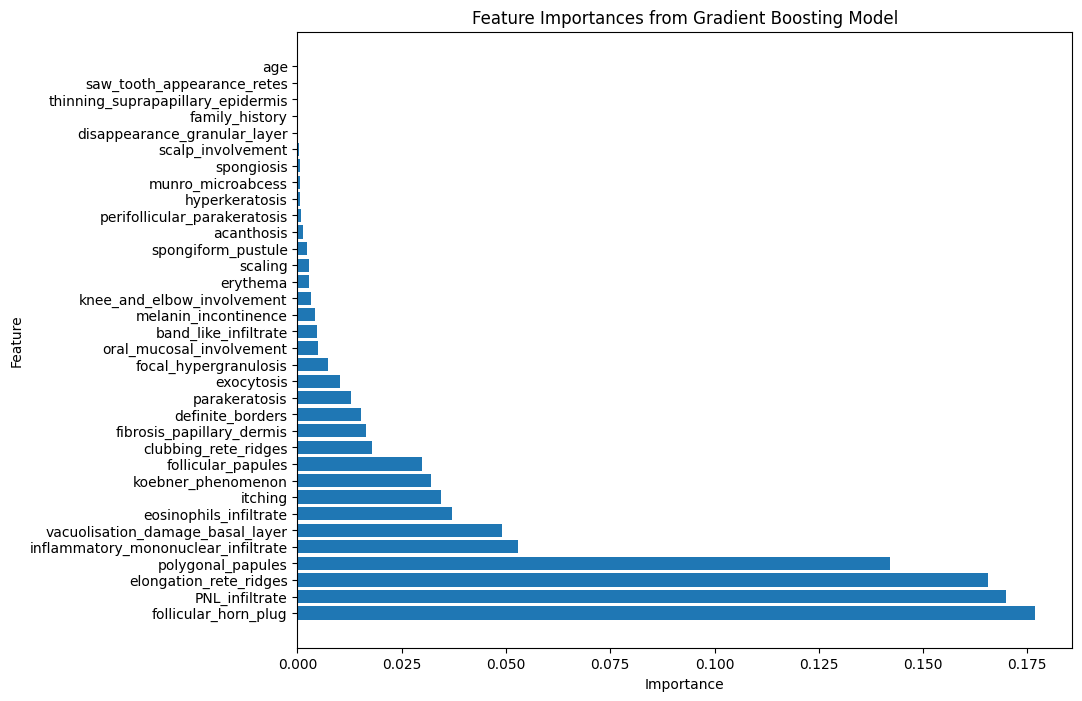

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Your feature names
feature_names = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'family_history',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
    'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess',
    'focal_hypergranulosis', 'disappearance_granular_layer',
    'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes',
    'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate', 'age'
]

# Ensure feature_names matches the number of features in X_train_preprocessed
if len(feature_names) != X_train_preprocessed.shape[1]:
    raise ValueError("Number of feature names does not match the number of features in X_train_preprocessed.")

# Get feature importances
feature_importances = gb_clf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()



In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Convert NumPy arrays to DataFrames with appropriate feature names
feature_names = list(importance_df['Feature'])
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize list to store results
results = []

# Iterate over different numbers of top features
for top_n in range(1, len(feature_names) + 1):
    # Select the top N important features
    top_features = importance_df.head(top_n)['Feature'].values
    X_train_top_features = X_train_df[top_features]
    X_test_top_features = X_test_df[top_features]

    # Fit the model on the training data
    gb_clf.fit(X_train_top_features, y_train_resampled)

    # Predict on the test set
    y_pred_test = gb_clf.predict(X_test_top_features)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_test)

    # Store results
    results.append({
        'Top Features': top_n,
        'Test Accuracy': accuracy
    })

    # Print results if accuracy exceeds 0.9
    if accuracy > 0.9:
        print(f"\nGradient Boosting with Top {top_n} Features achieving Test Accuracy > 0.9:")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred_test)}")
        break

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nAll Results:")
print(results_df)





Gradient Boosting with Top 12 Features achieving Test Accuracy > 0.9:
Test Accuracy: 0.9041
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        27
           2       0.75      0.82      0.78        11
           3       1.00      1.00      1.00        13
           4       0.75      0.86      0.80         7
           5       0.78      0.78      0.78         9
           6       1.00      1.00      1.00         6

    accuracy                           0.90        73
   macro avg       0.88      0.90      0.89        73
weighted avg       0.91      0.90      0.91        73


All Results:
    Top Features  Test Accuracy
0              1       0.273973
1              2       0.205479
2              3       0.232877
3              4       0.410959
4              5       0.520548
5              6       0.602740
6              7       0.671233
7              8       0.698630
8              9       0.821918
9      

WITH TOP 16 FEATURES

In [39]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Convert NumPy arrays to DataFrames with appropriate feature names
feature_names = list(importance_df['Feature'])
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Select the top 16 important features
top_features = importance_df.head(16)['Feature'].values
X_train_top_features = X_train_df[top_features]
X_test_top_features = X_test_df[top_features]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Logistic Ridge': RidgeClassifier(random_state=42),
    'Logistic Lasso': LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Fit and evaluate each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_top_features, y_train_resampled)

    # Predict on the training set
    y_pred_train = model.predict(X_train_top_features)
    # Predict on the test set
    y_pred_test = model.predict(X_test_top_features)

    # Evaluate the model on the training set
    print(f"\n{model_name} Performance with Top 16 Features on Training Set:")
    print("Classification Report:")
    print(classification_report(y_train_resampled, y_pred_train))
    print("Accuracy:", accuracy_score(y_train_resampled, y_pred_train))

    # Evaluate the model on the test set
    print(f"\n{model_name} Performance with Top 16 Features on Test Set:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("Accuracy:", accuracy_score(y_test, y_pred_test))



Logistic Regression Performance with Top 16 Features on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        85
           2       0.94      0.88      0.91        85
           3       1.00      1.00      1.00        85
           4       0.91      0.96      0.94        85
           5       1.00      0.99      0.99        85
           6       0.99      1.00      0.99        85

    accuracy                           0.97       510
   macro avg       0.97      0.97      0.97       510
weighted avg       0.97      0.97      0.97       510

Accuracy: 0.9686274509803922

Logistic Regression Performance with Top 16 Features on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        27
           2       0.69      1.00      0.81        11
           3       1.00      0.85      0.92        13
           4       0.75    

In [40]:
rf_clf=models['Random Forest']

In [41]:
import pickle 
with open("dermatology.pickle","wb") as f:
    pickle.dump(rf_clf,f)

In [42]:
import json
columns = {
    "data_columns": [col.lower() for col in top_features]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))